# TP 2 : Méthodes de classification 

In [1]:
# Import libraries 
import numpy as np
import itertools  

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Data

In [2]:
# Import Data 
train=pd.read_csv('vowel.train.csv', sep=',',index_col=0)
test=pd.read_csv('vowel.test.csv', sep=',',index_col=0)
# Extract Features & labels
## Features : 
X_train=train.values[:,1:]
X_test=test.values[:,1:]
## Labels 
y_train=train.values[:,0]
y_test=test.values[:,0]
# Description 
print("La taille de X_train est = " , X_train.shape  )
print("La taille de X_test est =" , X_test.shape  )
print("La taille du vecteur y_train est =" , len(y_train) )
print("La taille du vecteur y_test est =" , len(y_test) )

train.head()

La taille de X_train est =  (528, 10)
La taille de X_test est = (462, 10)
La taille du vecteur y_train est = 528
La taille du vecteur y_test est = 462


,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


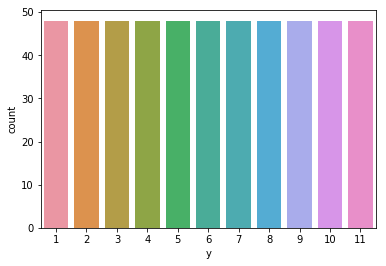

In [3]:
# Nature of labels : 
np.unique(train['y'])
# Number of observation :
#print(train.groupby(['y']).count())

ax = sns.countplot(x="y", data=train)

On veut batir un modèle pour prédire $Y\in\left \{ 1,\cdots,11 \right \}$ . C'est un problème de classification multiclasse . En plus les observations sont bien équilibrées . On va entrainer dans la suite les méthodes de classificassion classiques : Naive Bayes , LDA , QDA puis 

# Naive BAYES :

### Principe : 

Soit $\mathbf{X}=(X_1,\cdots,X_n)$ vecteur aléatoire des observations $x\in\mathbb{X}$ . Soit $C$ la variable aléatoire décrivant la classe associée à $\mathbf{X}$ étant donné que X = x. Un classifieur probabiliste $f_{Bayes}$ assigne la classe $c$ à une nouvelle observation $x$ si $c$ maximise la probabilité conditionnelle de $C = c$ étant donné que $X = x$. Plus formellement : 
$$ f_{Bayes}(x):=\underset{c\in \mathfrak{\mathfrak{C}}}{\text{argmax}}~\mathbb{P}(\mathbf{C}=c |\mathbf{X}=x) $$

Avec la formule de Bayes + l'hypothèse que les features $X_i$ sont contionnellement indépendantes , on a : 
$$f_{Bayes}(x):=\underset{c\in \mathfrak{\mathfrak{C}}}{\text{argmax}}~\mathbb{P}(\mathbf{C}=c )\prod_{i=1}^{n}\mathbb{P}(X_i=x_i|C=c)$$
Il suffit donc d'estimer $\mathbb{P}(C)$ et $\mathbb{P}(X_i|C)$ pour trouver $\hat{c}$ qui maximise l'expression précedente .

In [4]:
names = ["NB", "LDA", "QDA"]
classifiers = [
        GaussianNB(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis()]
clf_names=[(a,b) for (a,b) in zip(names,classifiers)]

In [5]:
# Prediction : 
def predict_clf(clf,X_train,y_train,X_new):
        fit_clf=clf.fit(X_train,y_train) ## we train model of clf
        y_pred_new=fit_clf.predict(X_new) ## prediction of y_new
        return y_pred_new
    
# Exemple de prediction : LDA

X_new=X_test
clf=LinearDiscriminantAnalysis()
Y=predict_clf(clf,X_train,y_train,X_new)
display(pd.DataFrame(Y)[0:5])

,0
0,3.0
1,1.0
2,2.0
3,4.0
4,7.0


In [6]:
# Fonction score qui en argument clf_ : (LDA,NB,QDA) ,X_train,X_test,y_train,y_test et retourne
# l'accuraccy et le score f1 pour le train et test

def score_clf(clf_,X_train,X_test,y_train,y_test):
        name_clf,clf=clf_
        fit_clf=clf.fit(X_train,y_train) ## we train model of clf
        y_pred_train=fit_clf.predict(X_train) ## prediction 
        y_pred_test=fit_clf.predict(X_test)
        acc_train=accuracy_score(y_train,y_pred_train)
        acc_test=accuracy_score(y_test,y_pred_test)
        # F1 = 2 * (precision * recall) / (precision + recall)
        f1_train=f1_score(y_train,y_pred_train,average=None).mean()
        f1_test=f1_score(y_test,y_pred_test,average=None).mean()
        res={"Classifier":name_clf ,"acc_train":acc_train,"acc_test":acc_test ,\
             "f1_train":f1_train, "f1_test":f1_test  }
        return res
    

    
def score_all():
    res=[]
    for i in range(3):
        clf_=clf_names[i]
        res.append(score_clf(clf_,X_train,X_test,y_train,y_test))
    return(pd.DataFrame(res)) 

In [7]:
#les scores de chaque méthode sur X_train et X_test
score_all()

,Classifier,acc_test,acc_train,f1_test,f1_train
0,NB,0.461039,0.719697,0.453837,0.721221
1,LDA,0.443723,0.683712,0.437730,0.682157
2,QDA,0.471861,0.988636,0.453292,0.988594


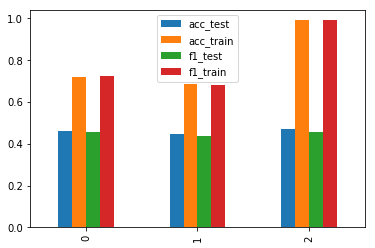

In [8]:
score_all().plot.bar()


La méthode QDA est la meilleure au niveau des scores avec une précision de 47% ! 

###### Cross Validation :

In [9]:
from sklearn.model_selection import cross_val_score


## Fonction qui retourne la moyenne des scores en cross-validant
def cross(clf,features,target,cv):
    scores=cross_val_score(clf,features,target,cv=cv)
    scores_mean =scores.mean()
    scores_std =scores.std()

    return [scores_mean,"+-",scores_std]

    
def cross_all(cv):
    res=[]
    for i in range(3):
        name,clf_=clf_names[i]
        res.append(name)
        res.append(cross(clf_,X_train,y_train,10))
    return res


In [10]:
cross_all(7)

['NB',
 [0.5736363636363636, '+-', 0.18966913340153496],
 'LDA',
 [0.5554545454545454, '+-', 0.16636363636363638],
 'QDA',
 [0.7945454545454546, '+-', 0.14461119145562307]]

La méthode QDA est reste la meilleure après la cross-validation avec une précision moyenne de 80% +- 15% ! 

## KNN :

In [11]:

# Fonction qui retourne Train_prediction et Test_prediction : 
def knn_pred(k,X_train,X_test,y_train,y_test):
    knn_clf=KNeighborsClassifier(n_neighbors=k)
    fit_clf=knn_clf.fit(X_train, y_train)
    y_pred_train=knn_clf.predict(X_train)
    y_pred_test=knn_clf.predict(X_test)
    return {"Train_prediction": y_pred_train,"Test_prediction":y_pred_test}

# Fonction qui retourne les scores de chaque k-nn : 

def knn_score(k,X_train,X_test,y_train,y_test):
    knn_clf=KNeighborsClassifier(n_neighbors=k)
    fit_clf=knn_clf.fit(X_train, y_train)
    y_pred_train=knn_clf.predict(X_train)
    y_pred_test=knn_clf.predict(X_test)
    acc_train=accuracy_score(y_train,y_pred_train)
    acc_test=accuracy_score(y_test,y_pred_test)
    # F1 = 2 * (precision * recall) / (precision + recall)
    f1_train=f1_score(y_train,y_pred_train,average=None).mean()
    f1_test=f1_score(y_test,y_pred_test,average=None).mean()
    res={"Classifier":str(k)+"-NN" ,"acc_train":acc_train,"acc_test":acc_test ,\
             "f1_train":f1_train, "f1_test":f1_test  }
    return pd.DataFrame.from_dict([res])
    
    

In [12]:
# Example pour k=3 :  
knn_score(3,X_train,X_test,y_train,y_test)

,Classifier,acc_test,acc_train,f1_test,f1_train
0,3-NN,0.564935,0.998106,0.565441,0.998106


#### Comparaison des scores pour différentes valeurs de k : 

In [13]:
N=100
ACC_test=[]
ACC_train=[]
F1_test=[]
F1_train=[]
for k in range(1,N):
    scores=knn_score(k,X_train,X_test,y_train,y_test)
    acc_test=scores.iloc[:,1]
    acc_train=scores.iloc[:,2]
    f1_test=scores.iloc[:,3]
    f1_train=scores.iloc[:,4]
    ACC_test.append(float(acc_test))
    ACC_train.append(float(acc_train))
    F1_train.append(float(f1_train))
    F1_test.append(float(f1_test))
    k+=1    

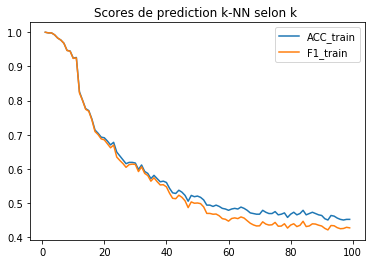

In [14]:
# Plot :Scores de prediction k-NN selon k pour X_Train 
K=np.arange(1,N)
plt.plot(K,ACC_train,label="ACC_train")
plt.plot(K,F1_train,label="F1_train")
plt.title("Scores de prediction k-NN selon k ")
plt.legend()



In [15]:
print("k={} donne sur X_train la meilleure précision et F1-score ce qui est logique !  ".format(np.argmax(F1_train)+1))

k=1 donne sur X_train la meilleure précision et F1-score ce qui est logique !  


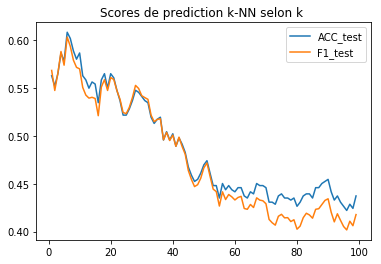

In [16]:
# Plot :Scores de prediction k-NN selon k pour X_test 
plt.plot(K,ACC_test,label="ACC_test")
plt.plot(K,F1_test,label="F1_test")
plt.title("Scores de prediction k-NN selon k ")
plt.legend()


In [17]:
k_hat=np.argmax(F1_test)+1

print("k={} donne sur X_test la meilleure précision et F1-score ".format(k_hat))

k=6 donne sur X_test la meilleure précision et F1-score 


## Bilan: comparaison de certaines méthodes de classification 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


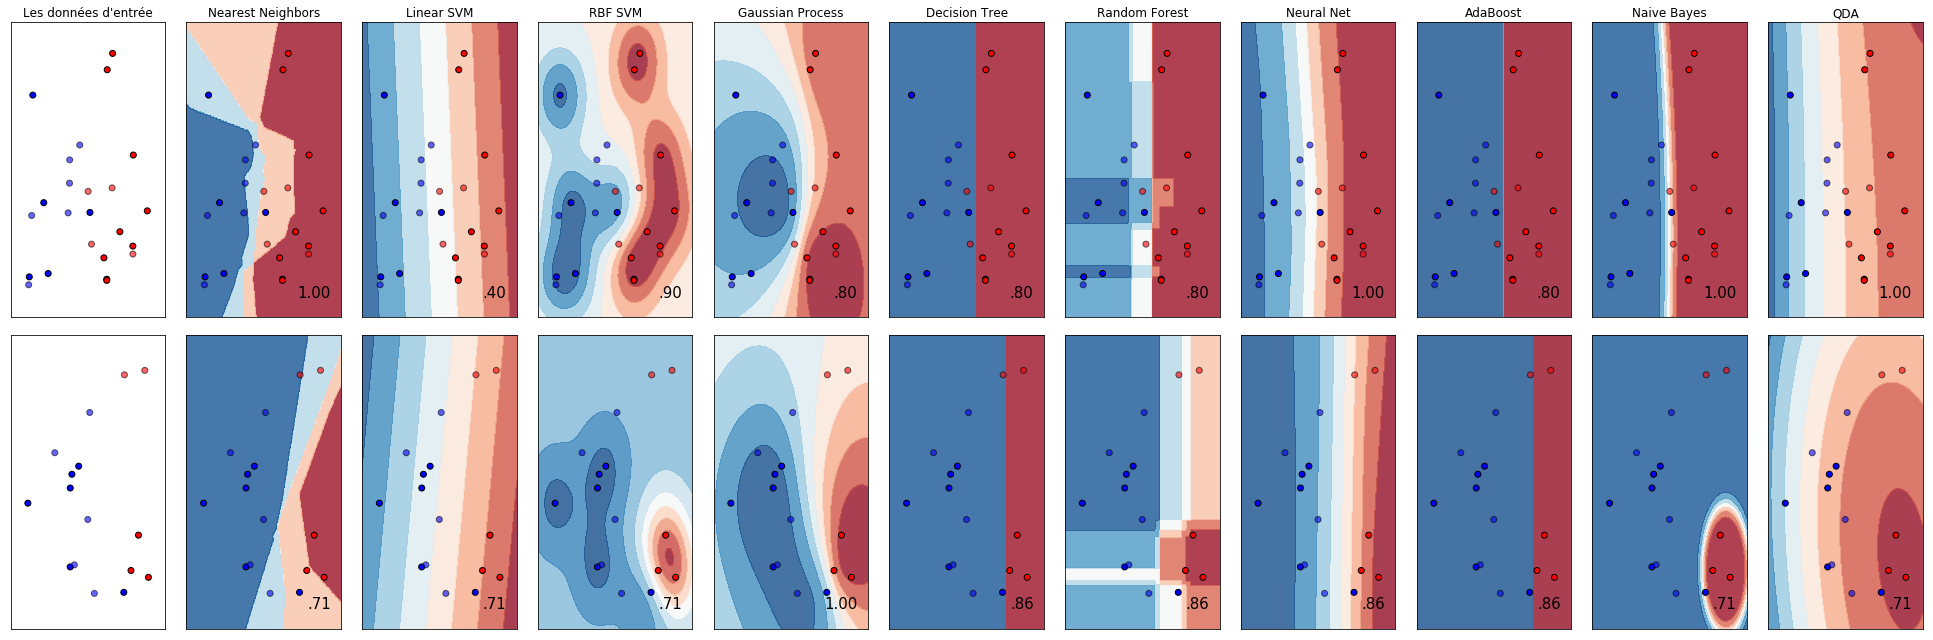

In [48]:
h = .02  # taille de pas dans le maillage

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [(X_train,y_train),(X_test,y_test)]
            

figure = plt.figure(figsize=(27, 9))
i = 1
# itérer sur les jeux de données
for ds_cnt, ds in enumerate(datasets):
    # pré-traitement du jeu de données, scindé en partie train et test    
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # tracer d'abord le jeu de données    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Les données d'entrée")
    # Tracer les points d'entraînement    
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
    # et les points de test    
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    scores={}
        # itérer sur les classificateurs
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        scores[str(name)]=score

                    # Tracez la limite de décision. Pour cela, nous allons assigner une couleur à chaque
                    # point dans le maillage [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Mettre le résultat dans un tracé de couleur        
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Tracer aussi les points d'entraînement
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
        # et les points de test        
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()


In [49]:
# le score de chaque méthode: 
scores


{'Nearest Neighbors': 0.7142857142857143,
 'Linear SVM': 0.7142857142857143,
 'RBF SVM': 0.7142857142857143,
 'Gaussian Process': 1.0,
 'Decision Tree': 0.8571428571428571,
 'Random Forest': 0.8571428571428571,
 'Neural Net': 0.8571428571428571,
 'AdaBoost': 0.8571428571428571,
 'Naive Bayes': 0.7142857142857143,
 'QDA': 0.7142857142857143}

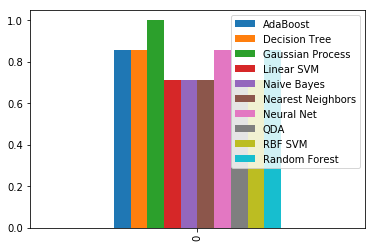

In [51]:
# Plot : le score de chaque méthode: 

pd.DataFrame([scores]).plot.bar()
